In [1]:
from OptionPricing import *
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
lwidth = 1
lcolor = 'black'

## 1. Poisson Processes

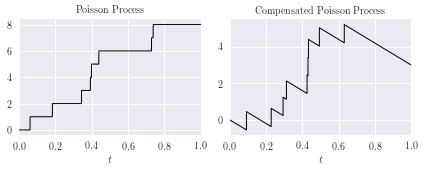

In [3]:
# Poisson & Compensated Poisson Processes

np.random.seed(seed=123)

lam = 6
T = 1
poissonProcess = PoissonProcess(lam=lam, T=T)
poissonProcessCom = PoissonProcess(lam=lam, T=T, compensated=True)

fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
fig.tight_layout()
ax[0].margins(x=0)
ax[1].margins(x=0)
ax[0].plot(poissonProcess.generatePaths(), lw=lwidth, c=lcolor)
ax[1].plot(poissonProcessCom.generatePaths(), lw=lwidth, c=lcolor)
ax[0].set_title('Poisson Process', fontsize=10)
ax[1].set_title('Compensated Poisson Process', fontsize=10)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\poissonPaths.pdf')

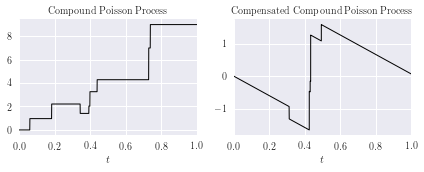

In [4]:
# Compound Poisson & Compensated Compound Poisson Processes

np.random.seed(seed=123)

lam = 6
T = 1
mu_Y = 0.5
sig_Y = 1
compoiProcess = CompoundPoissonProcess(lam=lam, T=T, jumpSizeRV=sp.norm(loc=mu_Y, scale=sig_Y))
compoiProcessCom = CompoundPoissonProcess(lam=lam, T=T, jumpSizeRV=sp.norm(loc=mu_Y, scale=sig_Y), compensated=True)

fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
fig.tight_layout()
ax[0].margins(x=0)
ax[1].margins(x=0)
ax[0].plot(compoiProcess.generatePaths(), lw=lwidth, c=lcolor)
ax[1].plot(compoiProcessCom.generatePaths(), lw=lwidth, c=lcolor)
ax[0].set_title('Compound Poisson Process', fontsize=10)
ax[1].set_title('Compensated Compound Poisson Process', fontsize=10)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\compoissonPaths.pdf')

## 2. Merton Model

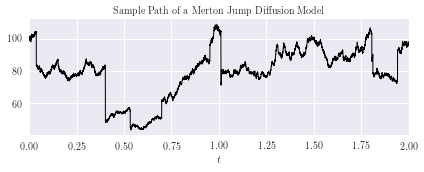

In [5]:
np.random.seed(seed=123)

lam = 4
mu_Y = -0.1
sig_Y= 0.2
sigma = 0.25
r = 0.05
s0 = 100
T = 2
mertonModel = MertonModel(lam=lam, mu_j=mu_Y, sig_j=sig_Y, sigma=sigma, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(mertonModel.generatePaths(), lw=lwidth, c=lcolor)
ax.set_title('Sample Path of a Merton Jump Diffusion Model', fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\mertonJDPath.pdf')

## 3. NIG Model

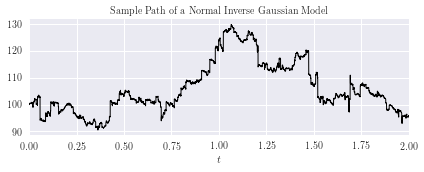

In [6]:
np.random.seed(seed=123)

theta = 0.1
sigma = 0.4
kappa = 0.2
r = 0.05
s0 = 100
T = 2
nigModel = NIGModel(theta=theta, sigma=sigma, kappa=kappa, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(nigModel.generatePaths(), lw=lwidth, c=lcolor)
ax.set_title('Sample Path of a Normal Inverse Gaussian Model', fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\nigPath.pdf')